# Analyzing the SpaceJob.US Datastore

## Prep full Dataset

In [13]:
using DataFrames
using RDatasets
using DataStructures
using Gadfly
set_default_plot_size(25cm, 10cm)

In [14]:
spaceData = readtable("spacejobs-may-1-2015.csv", separator=',', header=true)

1502x8 DataFrame
| Row  | id    | term        | location                              |
|------|-------|-------------|---------------------------------------|
| 1    | 25669 | "Full-Time" | "Littleton, CO"                       |
| 2    | 27446 | "Full-Time" | "Melbourne, FL"                       |
| 3    | 2075  | "Part Time" | "Huntsville, Alabama"                 |
| 4    | 2628  | "Full-Time" | "Edwards Air Force Base, CA"          |
| 5    | 36349 | "Full Time" | "Washington DC, District of Columbia" |
| 6    | 32224 | "Full-time" | "Hawthorne, CA"                       |
| 7    | 1505  | "Full-Time" | "Colorado Springs, CO"                |
| 8    | 115   | "Full-time" | "Hawthorne, CA"                       |
| 9    | 42483 | "Full-Time" | "Littleton, CO"                       |
| 10   | 485   | "Full-time" | "Seattle, WA"                         |
| 11   | 128   | "Full-time" | "Hawthorne, CA"                       |
⋮
| 1491 | 24415 | "Full-time" | "Cape Canaveral, FL"                  |
| 1492 | 7080  | "Full-Time" | "Herndon, VA"                         |
| 1493 | 377   | "Full-time" | "Hawthorne, CA"                       |
| 1494 | 378   | "Full-time" | "Cape Canaveral, FL"                  |
| 1495 | 379   | "Full-time" | "Cape Canaveral, FL"                  |
| 1496 | 380   | "Full-time" | "Hawthorne, CA"                       |
| 1497 | 44296 | "Full-Time" | "Littleton, CO"                       |
| 1498 | 381   | "Full-time" | "Cape Canaveral, FL"                  |
| 1499 | 382   | "Full-time" | "Cape Canaveral, FL"                  |
| 1500 | 383   | "Full-time" | "Cape Canaveral, FL"                  |
| 1501 | 384   | "Full-time" | "Hawthorne, CA"                       |
| 1502 | 17900 | "Full-Time" | "Palo Alto, CA"                       |

| Row  | jobposition                                                                    |
|------|--------------------------------------------------------------------------------|
| 1    | "Mechanical Engineer Sr"                                                       |
| 2    | "Mechanical Field Engineer"                                                    |
| 3    | "Banquet Server"                                                               |
| 4    | "Senior Mission Planner / IT Skills / F-35 / CSO / Flight Ops"                 |
| 5    | "Media Relations Specialist"                                                   |
| 6    | "Supplier Performance Lead"                                                    |
| 7    | "Software Engineer"                                                            |
| 8    | "Dynamics Certification Engineer"                                              |
| 9    | "Electronics Engineer Sr"                                                      |
| 10   | "Satellite Lead Analyst, Thermal Loads"                                        |
| 11   | "Aerodynamics Engineer"                                                        |
⋮
| 1491 | "Dining Room Attendant"                                                        |
| 1492 | "Systems Administrator Sr"                                                     |
| 1493 | "Mechanical Engineer - Launch Engineering"                                     |
| 1494 | "Manufacturing Engineer (Ground Support Equipment)"                            |
| 1495 | "Lead Field Machinist"                                                         |
| 1496 | "Spacecraft Recovery Electrical Engineer (Command, Control & Instrumentation)" |
| 1497 | "Sys Integratn/Test Eng Asc"                                                   |
| 1498 | "Spacecraft Recovery Operations Engineer, Cape"                                |
| 1499 | "Launch Project Engineer"                                                      |
| 1500 | "Launch Pad Technician"                                                        |
| 1501 | "Launch Engineer, Fluid Systems"                                               |
| 1502 | "Research Engineering Sr Mgr"     

In [15]:
typeof(spaceData)

DataFrame (constructor with 11 methods)

In [16]:
nrows = size(spaceData, 1)
ncols = size(spaceData, 2)
println("There are $(nrows) rows and $(ncols) columns.")

There are 1502 rows and 8 columns.


## Job Terms

####Frequency of unique job terms

In [17]:
jobTermList = Array(ASCIIString,0)

for i = 1:nrows
    idJobTerm = spaceData[i, :term]
    processedItem = replace(idJobTerm,"-", " ")
    processedItem = uppercase(processedItem)
    push!(jobTermList, processedItem)
end

In [18]:
unique(jobTermList)

9-element Array{ASCIIString,1}:
 "FULL TIME"         
 "PART TIME"         
 "CALL IN"           
 "SEASONAL"          
 "MULTIPLE SCHEDULES"
 "CONTRACTOR"        
 "TEMPORARY"         
 "TASK ORDER/IDIQ"   
 "INTERN"            

In [19]:
term_freq = Dict{String, Int64}()

for word in jobTermList
    term_freq[word] = get(term_freq,word,0) + 1
end

In [20]:
for i in term_freq
    println(i)
end

("PART TIME",34)
("MULTIPLE SCHEDULES",1)
("FULL TIME",1394)
("CONTRACTOR",11)
("SEASONAL",17)
("CALL IN",14)
("TASK ORDER/IDIQ",8)
("INTERN",20)
("TEMPORARY",3)


In [21]:
typeof(term_freq)

Dict{String,Int64} (constructor with 3 methods)

####Charted job terms

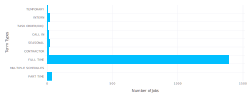

In [22]:
plot(x=collect(values(term_freq)), y=collect(keys(term_freq)), Guide.xlabel("Number of Jobs"), Guide.ylabel("Term Types"),Geom.bar(orientation=:horizontal))

## Location

####Frequency of Unique Job Location

In [23]:
jobLocationListUnique = Array(ASCIIString,0)

for i = 1:nrows
    idJobLocation = spaceData[i, :location]
    processedItem = lstrip(idJobLocation)
    processedItem = uppercase(processedItem)
    push!(jobLocationListUnique, processedItem)
end

In [24]:
unique(jobLocationListUnique)

99-element Array{ASCIIString,1}:
 "LITTLETON, CO"                              
 "MELBOURNE, FL"                              
 "HUNTSVILLE, ALABAMA"                        
 "EDWARDS AIR FORCE BASE, CA"                 
 "WASHINGTON DC, DISTRICT OF COLUMBIA"        
 "HAWTHORNE, CA"                              
 "COLORADO SPRINGS, CO"                       
 "SEATTLE, WA"                                
 "CAPE CANAVERAL, FL"                         
 "FORT WALTON BEACH, FL"                      
 "PUYALLUP, WA"                               
 "HANOVER, MD"                                
 "ORLANDO, FL"                                
 ⋮                                            
 "SPRINGFIELD, MO"                            
 "LUFKIN, TX"                                 
 "MOFFETT FIELD, CA"                          
 "COPPELL, TX"                                
 "CHERRY POINT, NC"                           
 "WEST TEXAS LAUNCH SITE NEAR VAN HORN, TEXAS"
 "NEW NORK, NY"            

In [25]:
location_freq = Dict{String, Int64}()

for location in jobLocationListUnique
    location_freq[location] = get(location_freq,location,0) + 1
end

In [26]:
for i in location_freq
    println(i)
end

("PENSACOLA, FL",1)
("MOFFETT FIELD, CA",1)
("ANCHORAGE, AK",1)
("FORT BELVOIR, VA",1)
("HILL AIR FORCE BASE, UT",6)
("SEATTLE, WA",38)
("ARLINGTON, VA",4)
("EAGAN, MN",4)
("ORLANDO, FL",41)
("SUNNYVALE, CA",58)
("KING GEORGE, VA",4)
("BEAUFORT, SC",2)
("CORPUS CHRISTI, TX",2)
("OLDSMAR, FL",4)
("CLEVELAND, OHIO",1)
("OWEGO, NY",7)
("LUKE AIR FORCE BASE, AZ",7)
("LUFKIN, TX",1)
("COLORADO SPRINGS, CO",9)
("LITTLETON, CO",185)
("CENTENNIAL, CO",2)
("HOUSTON, TEXAS",2)
("MOFFETT FIELD, CALIFORNIA",1)
("HONOLULU, HI",1)
("STENNIS SPACE CENTER, MS",24)
("SILVERDALE, WA",1)
("BOSTON, MA",1)
("CHARLESTON, SC",1)
("BATH, ME",1)
("ROCKVILLE, MD",2)
("DENVER, CO",1)
("OKLAHOMA CITY, OK",2)
("VANDENBERG AIR FORCE BASE, CA",2)
("COPPELL, TX",1)
("LOUISVILLE, CO",1)
("MCGREGOR, TX",78)
("WASHINGTON, DC",3)
("PETERSON AIR FORCE BASE, CO",2)
("RIO GRANDE VALLEY, TX",2)
("GREENBELT, MD",5)
("GREENBELT, MARYLAND",4)
("HAWTHORNE, CA",598)
("LEXINGTON, KY",1)
("PUYALLUP, WA",2)
("EGLIN AIR FORCE BASE, F

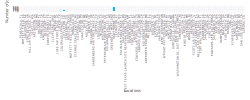

In [58]:
plot(x=collect(keys(location_freq)), y=collect(values(location_freq)), Guide.xlabel("Locations"), Guide.ylabel("Number of Jobs"),Geom.bar)

####Frequency of Job Location by State

In [27]:
state_to_code = ["VERMONT"=> "VT", "GEORGIA"=> "GA", "IOWA"=> "IA", "ARMED FORCES PACIFIC"=> "AP", "GUAM"=> "GU", "KANSAS"=> "KS", "FLORIDA"=> "FL", "AMERICAN SAMOA"=> "AS", "NORTH CAROLINA"=> "NC", "HAWAII"=> "HI", "NEW YORK"=> "NY", "CALIFORNIA"=> "CA", "ALABAMA"=> "AL", "IDAHO"=> "ID", "FEDERATED STATES OF MICRONESIA"=> "FM", "ARMED FORCES AMERICAS"=> "AA", "DELAWARE"=> "DE", "ALASKA"=> "AK", "ILLINOIS"=> "IL", "ARMED FORCES AFRICA"=> "AE", "SOUTH DAKOTA"=> "SD", "CONNECTICUT"=> "CT", "MONTANA"=> "MT", "MASSACHUSETTS"=> "MA", "PUERTO RICO"=> "PR", "ARMED FORCES CANADA"=> "AE", "NEW HAMPSHIRE"=> "NH", "MARYLAND"=> "MD", "NEW MEXICO"=> "NM", "MISSISSIPPI"=> "MS", "TENNESSEE"=> "TN", "PALAU"=> "PW", "COLORADO"=> "CO", "ARMED FORCES MIDDLE EAST"=> "AE", "NEW JERSEY"=> "NJ", "UTAH"=> "UT", "MICHIGAN"=> "MI", "WEST VIRGINIA"=> "WV", "WASHINGTON"=> "WA", "MINNESOTA"=> "MN", "OREGON"=> "OR", "VIRGINIA"=> "VA", "VIRGIN ISLANDS"=> "VI", "MARSHALL ISLANDS"=> "MH", "WYOMING"=> "WY", "OHIO"=> "OH", "SOUTH CAROLINA"=> "SC", "INDIANA"=> "IN", "NEVADA"=> "NV", "LOUISIANA"=> "LA", "NORTHERN MARIANA ISLANDS"=> "MP", "NEBRASKA"=> "NE", "ARIZONA"=> "AZ", "WISCONSIN"=> "WI", "NORTH DAKOTA"=> "ND", "ARMED FORCES EUROPE"=> "AE", "PENNSYLVANIA"=> "PA", "OKLAHOMA"=> "OK", "KENTUCKY"=> "KY", "RHODE ISLAND"=> "RI", "DISTRICT OF COLUMBIA"=> "DC", "ARKANSAS"=> "AR", "MISSOURI"=> "MO", "TEXAS"=> "TX", "MAINE"=> "ME"]

jobLocationListState = Array(ASCIIString,0)

for i = 1:nrows
    idJobLocation = spaceData[i, :location]
    processedItem = uppercase(idJobLocation)
    processedItem = rsplit(processedItem, ",")
    processedItem = processedItem[2]
    processedItem = lstrip(processedItem)
    if length(processedItem) > 3
        processedItem = state_to_code[processedItem]
    end
    push!(jobLocationListState, processedItem)
end


In [28]:
state_freq = Dict{String, Int64}()

for state in jobLocationListState
    state_freq[state] = get(state_freq,state,0) + 1
end

In [29]:
for i in state_freq
    println(i)
end

("DC",6)
("NM",3)
("OK",2)
("NJ",27)
("MD",39)
("AL",43)
("AK",1)
("MO",2)
("FL",141)
("CO",209)
("NV",4)
("UT",6)
("CA",733)
("SC",3)
("NY",9)
("MN",4)
("ME",1)
("KY",2)
("OH",3)
("GA",7)
("WA",63)
("HI",1)
("NC",1)
("TX",118)
("AZ",12)
("VA",24)
("MS",26)
("PA",6)
("LA",3)
("IL",2)
("MA",1)


## Agency

####Frequency of Unique Agencies

In [30]:
agencyListUnique = Array(ASCIIString,0)

for i = 1:nrows
    idAgency = spaceData[i, :agency]
    processedItem = uppercase(idAgency)
    push!(agencyListUnique, processedItem)
end

In [31]:
unique(agencyListUnique)

5-element Array{ASCIIString,1}:
 "LOCKHEED MARTIN"                      
 "U.S. SPACE & ROCKET CENTER FOUNDATION"
 "NASA"                                 
 "SPACEX"                               
 "BLUE ORIGINS"                         

In [32]:
agency_freq = Dict{String, Int64}()

for agency in agencyListUnique
    agency_freq[agency] = get(agency_freq,agency,0) + 1
end

In [33]:
for i in agency_freq
    println(i)
end

("SPACEX",797)
("U.S. SPACE & ROCKET CENTER FOUNDATION",32)
("BLUE ORIGINS",24)
("LOCKHEED MARTIN",634)
("NASA",15)


## Jobs Over Time

####Rate of Jobs Over Time

In [34]:
dateListUnique = Array(ASCIIString,0)

for i = 1:nrows
    idDate = spaceData[i, :dateposted]
    processedItem = uppercase(idDate)
    push!(dateListUnique, processedItem)
end

In [35]:
unique(dateListUnique)

48-element Array{ASCIIString,1}:
 "04-09-2015"
 "04-11-2015"
 "03-12-2015"
 "03-13-2015"
 "04-21-2015"
 "04-17-2015"
 "03-11-2015"
 "03-10-2015"
 "04-28-2015"
 "04-01-2015"
 "03-18-2015"
 "03-19-2015"
 "03-20-2015"
 ⋮           
 "03-17-2015"
 "04-26-2015"
 "04-05-2015"
 "04-14-2015"
 "04-22-2015"
 "03-24-2015"
 "04-15-2015"
 "04-13-2015"
 "04-25-2015"
 "04-27-2015"
 "03-23-2015"
 "04-06-2015"

In [36]:
date_freq = Dict{String, Int64}()

for date in dateListUnique
    date_freq[date] = get(date_freq,date,0) + 1
end

In [37]:
for i in date_freq
    println(i)
end

("05-01-2015",19)
("04-26-2015",3)
("04-24-2015",14)
("04-09-2015",11)
("04-21-2015",27)
("03-27-2015",20)
("03-13-2015",308)
("04-07-2015",13)
("03-11-2015",32)
("04-02-2015",20)
("04-16-2015",15)
("03-22-2015",4)
("03-25-2015",27)
("04-17-2015",17)
("03-19-2015",10)
("04-27-2015",4)
("04-15-2015",12)
("04-05-2015",4)
("04-28-2015",23)
("03-17-2015",9)
("03-29-2015",1)
("04-04-2015",20)
("04-23-2015",17)
("04-25-2015",12)
("04-18-2015",23)
("04-01-2015",22)
("04-08-2015",27)
("04-13-2015",2)
("04-30-2015",23)
("04-14-2015",3)
("03-24-2015",10)
("03-14-2015",15)
("04-10-2015",18)
("03-18-2015",26)
("03-23-2015",1)
("03-10-2015",487)
("03-06-2015",10)
("04-11-2015",18)
("03-26-2015",13)
("03-21-2015",13)
("04-06-2015",1)
("03-12-2015",56)
("03-31-2015",16)
("04-29-2015",17)
("04-22-2015",12)
("03-20-2015",19)
("03-28-2015",7)
("04-03-2015",21)


## Departments

####Frequency of Unique Departments

In [38]:
departmentListUnique = Array(ASCIIString,0)

for i = 1:nrows
    idDepartment = spaceData[i, :department]
    processedItem = uppercase(idDepartment)
    processedItem = replace(processedItem, "X - ", "")
    push!(departmentListUnique, processedItem)
end

In [39]:
unique(departmentListUnique)

105-element Array{ASCIIString,1}:
 "MECHANICAL ENGINEERING"                                  
 "TECHNICIANS"                                             
 "CATERING"                                                
 "SYSTEMS ENGINEERING: OTHER"                              
 "HEADQUARTERS, NASA"                                      
 "MANUFACTURING AND PRODUCTION - OPERATIONS"               
 "SOFTWARE ENGINEERING"                                    
 "STRUCTURES - DYNAMICS DESIGN AND ANALYSIS"               
 "ELECTRONICS ENGINEERING"                                 
 "AVIONICS - HARDWARE DESIGN"                              
 "ROCKET LAUNCH FACILITY - CAPE CANAVERAL"                 
 "STRUCTURES - MECHANICAL DESIGN AND DEVELOPMENT"          
 "MANUFACTURING AND PRODUCTION - ENGINEERING"              
 ⋮                                                         
 "SYSTEMS ENGINEERING: DESIGN AND VERIFICATION"            
 "CAREERS IN CORPORATE BUSINESS OPERATIONS AND SUPPLY CHAI"
 "INFO

In [40]:
department_freq = Dict{String, Int64}()

for department in departmentListUnique
    department_freq[department] = get(department_freq,department,0) + 1
end

In [41]:
for i in department_freq
    println(i)
end

("STRUCTURES - MECHANICAL DESIGN AND DEVELOPMENT",27)
("HUMAN FACTORS ENGINEERING",2)
("MANUFACTURING AND PRODUCTION OPERATIONS",3)
("MANUFACTURING AND PRODUCTION - ENGINEERING",63)
("INFORMATION SECURITY/INFORMATION ASSURANCE",9)
("CAREERS IN CORPORATE BUSINESS OPERATIONS AND SUPPLY CHAI",1)
("ROCKET LAUNCH FACILITY - CAPE CANAVERAL",22)
("SOFTWARE ENGINEERING",146)
("PLANNING & LOGISTICS",3)
("TEXAS ROCKET DEVELOPMENT & TEST - ENGINEERING",23)
("CRAFT WORKERS",2)
("HARDWARE ENGINEERING",3)
("SYSTEMS ENGINEERING: REQUIREMENTS DEVELOPMENT",2)
("AMES RESEARCH CENTER",1)
("GLOBAL SPACE CAMP OPERATIONS",3)
("FACILITIES",5)
("SYSTEMS ENGINEERING: SOFTWARE",15)
("EDUCATION",1)
("PRODUCT SUPPORT",6)
("LOGISTICS",5)
("CATERING",2)
("ELECTRICAL ENGINEERING",11)
("PURCHASING/PROCUREMENT",3)
("PUBLIC RELATIONS",1)
("INFORMATION TECHNOLOGY",59)
("MERCHANDISE",1)
("FINANCE",11)
("TEXAS ROCKET DEVELOPMENT & TEST - OPERATIONS",10)
("INFORMATION TECHNOLOGY - BUSINESS ANALYSIS",9)
("ARMSTRONG FLIGHT R

#### Frequency of Words in Departments

In [42]:
departmentListWordsUnique = Array(ASCIIString,0)

for i = 1:nrows
    idDepartmentWords = spaceData[i, :department]
    processedItem = uppercase(idDepartmentWords)
    processedItem = replace(processedItem, ['-',',',':','/','&'], " ")
    processedItem = replace(processedItem, "X  ", "")
    processedItem = replace(processedItem, "  ", " ")
    processedItem = replace(processedItem, " AND ", " ")
    processedItem = replace(processedItem, " NASA", "")
    processedItem = replace(processedItem, "AMES", "")
    processedItem = replace(processedItem, "JOHN", "")
    processedItem = replace(processedItem, "B.", "")
    processedItem = replace(processedItem, "CANAVERAL", "")
    processedItem = replace(processedItem, "GODDARD", "")
    processedItem = replace(processedItem, "ARMSTRONG", "")
    processedItem = replace(processedItem, "TEXAS", "")
    processedItem = replace(processedItem, "LEWIS", "")
    processedItem = replace(processedItem, "CAPE", "")
    processedItem = replace(processedItem, "GLENN", "")
    processedItem = replace(processedItem, "LYNDON", "")
    processedItem = replace(processedItem, "VANDENBERG", "")
    processedItem = replace(processedItem, "REQUIREMENTS", "")
    processedList = split(processedItem)
    for items in processedList
        push!(departmentListWordsUnique, items)
    end
end

In [43]:
unique(departmentListWordsUnique)

120-element Array{ASCIIString,1}:
 "MECHANICAL"    
 "ENGINEERING"   
 "TECHNICIANS"   
 "CATERING"      
 "SYSTEMS"       
 "OTHER"         
 "HEADQUARTERS"  
 "MANUFACTURING" 
 "PRODUCTION"    
 "OPERATIONS"    
 "SOFTWARE"      
 "STRUCTURES"    
 "DYNAMICS"      
 ⋮               
 "ARCHITECT"     
 "SOUTH"         
 "VERIFICATION"  
 "CAREERS"       
 "IN"            
 "SUPPLY"        
 "CHAI"          
 "MARKETING"     
 "COMMUNICATIONS"
 "CONTRACTS"     
 "INTELLIGENCE"  
 "LEGAL"         

In [44]:
departmentWord_freq = Dict{String, Int64}()

for departmentWord in departmentListWordsUnique
    departmentWord_freq[departmentWord] = get(departmentWord_freq,departmentWord,0) + 1
end

In [45]:
for i in departmentWord_freq
    println(i)
end

("SKILLS",114)
("ASTRONAUT",4)
("CORPORATE",74)
("GLOBAL",3)
("PROCUREMENT",3)
("ANALYSIS",36)
("PROGRAM",6)
("RESOURCES",43)
("HEADQUARTERS",4)
("FLUIDS",5)
("PUBLIC",1)
("CAREERS",1)
("FACILITIES",14)
("INSPECTION",3)
("AERONAUTICAL",4)
("EDUCATION",1)
("ASSEMBLY",3)
("LOGISTICS",8)
("CATERING",2)
("HARDWARE",76)
("HUMAN",45)
("TRADE",114)
("SUPPLY",1)
("MERCHANDISE",1)
("LAUNCH",101)
("INTERNSHIPS",19)
("FINANCE",31)
("STRUCTURES",47)
("SERVICES",19)
("SERVICE",5)
("QUALITY",66)
("TEST",118)
("APPLICATIONS",5)
("MISCELLANEOUS",11)
("ELECTRONICS",16)
("FACILITY",45)
("CRAFT",2)
("PROPULSION",32)
("MECHANICAL",60)
("MISSION",18)
("PRODUCT",7)
("FOOD",24)
("SOUTH",1)
("OTHER",80)
("LEADERSHIP",29)
("SPACE",16)
("SPECIALTY",5)
("AT",1)
("CONTROL",6)
("SOFTWARE",180)
("LANGLEY",1)
("WORKERS",2)
("ELECTRICAL",11)
("CAMP",10)
("SAFETY",9)
("INTELLIGENCE",2)
("MATERIALS",2)
("ENGINEERS",3)
("BUSINESS",35)
("NETWORK",3)
("HEALTH",5)
("COLLEGE",19)
("ENVIRONMENT",5)
("COMMUNICATIONS",1)
("CUS

Group departments into larger categories